In [2]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import random 
import os
from shutil import copyfile
import random
import shutil
import numpy as np

import tensorflow as tf
#Library for CNN Model
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
from PIL import Image
import seaborn as sns

%matplotlib inline
sns.set()
%matplotlib inline 

In [4]:
dir_path ='C:\\Users\\obadr\\Desktop\\Sign Language\\archive'
for dirname, _, filenames in os.walk(dir_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\obadr\Desktop\Sign Language\archive\american_sign_language.PNG
C:\Users\obadr\Desktop\Sign Language\archive\amer_sign2.png
C:\Users\obadr\Desktop\Sign Language\archive\amer_sign3.png
C:\Users\obadr\Desktop\Sign Language\archive\Sign Language.py
C:\Users\obadr\Desktop\Sign Language\archive\sign_mnist_test.csv
C:\Users\obadr\Desktop\Sign Language\archive\sign_mnist_train.csv
C:\Users\obadr\Desktop\Sign Language\archive\smnist.h5
C:\Users\obadr\Desktop\Sign Language\archive\sign_mnist_test\sign_mnist_test.csv
C:\Users\obadr\Desktop\Sign Language\archive\sign_mnist_train\sign_mnist_train.csv


In [5]:
train_data=pd.read_csv('C:\\Users\\obadr\\Desktop\\Sign Language\\archive\\sign_mnist_test.csv')
test_data=pd.read_csv('C:\\Users\\obadr\\Desktop\\Sign Language\\archive\\sign_mnist_train.csv')

In [6]:
train_data.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [7]:
test_data.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [8]:

# Create training and testing arrays
train_set = np.array(train_data, dtype = 'float32')
test_set = np.array(test_data, dtype='float32')

In [9]:
#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

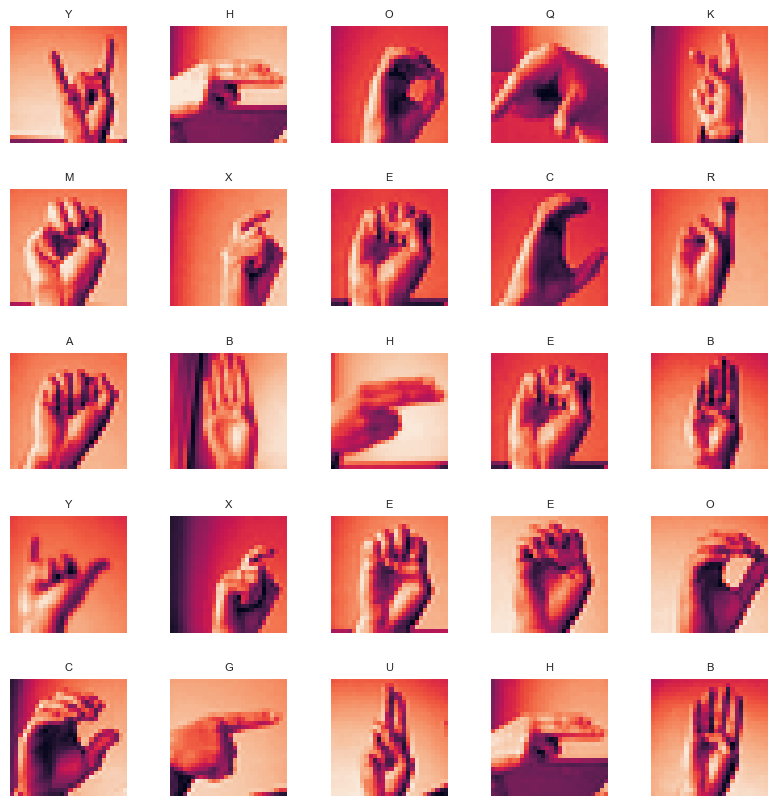

In [11]:
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_set) # get the length of the train dataset
# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_set[index,1:].reshape((28,28)) )
    label_index = int(train_set[index,0])
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [12]:

# Prepare the training and testing dataset 
X_train = train_set[:, 1:] / 255
y_train = train_set[:, 0]

X_test = test_set[:, 1:] / 255
y_test = test_set[:,0]
     

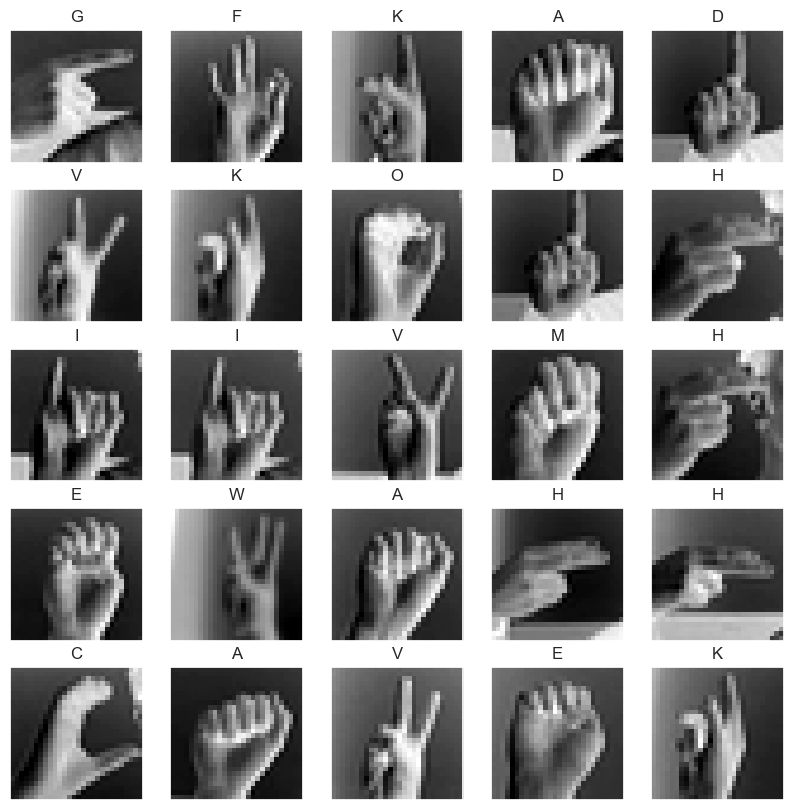

In [13]:

#Visualize train images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [14]:

from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [15]:

# Unpack the training and test tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)

(5737, 28, 28, 1)
(5737,)
(1435, 28, 28, 1)


In [16]:
def CNN_model():
  #Defining the Convolutional Neural Network
  cnn_model = Sequential()

  cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
  cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
  cnn_model.add(Dropout(0.25))

  cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
  cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
  cnn_model.add(Dropout(0.25))

  cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
  cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
  cnn_model.add(Dropout(0.25))

  cnn_model.add(Flatten())

  cnn_model.add(Dense(units = 512, activation = 'relu'))
  cnn_model.add(Dropout(0.25))
  cnn_model.add(Dense(units = 25, activation = 'softmax'))
  return cnn_model

In [17]:
CNN_model().summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [18]:
model=CNN_model()
model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

#Training the CNN model
history = model.fit(X_train, y_train, batch_size = 512, epochs = 50, verbose = 1, validation_data = (X_validate, y_validate))


Epoch 1/50
12/12 [==============================] - 4s 215ms/step - loss: 3.1827 - accuracy: 0.0622 - val_loss: 3.1620 - val_accuracy: 0.0544
Epoch 2/50
12/12 [==============================] - 2s 195ms/step - loss: 3.1486 - accuracy: 0.0634 - val_loss: 3.1459 - val_accuracy: 0.0753
Epoch 3/50
12/12 [==============================] - 2s 195ms/step - loss: 3.1326 - accuracy: 0.0779 - val_loss: 3.1268 - val_accuracy: 0.1491
Epoch 4/50
12/12 [==============================] - 2s 191ms/step - loss: 3.0718 - accuracy: 0.1032 - val_loss: 2.9850 - val_accuracy: 0.2300
Epoch 5/50
12/12 [==============================] - 2s 200ms/step - loss: 2.8958 - accuracy: 0.1462 - val_loss: 2.6695 - val_accuracy: 0.2655
Epoch 6/50
12/12 [==============================] - 2s 187ms/step - loss: 2.6415 - accuracy: 0.1938 - val_loss: 2.3996 - val_accuracy: 0.2948
Epoch 7/50
12/12 [==============================] - 2s 184ms/step - loss: 2.3786 - accuracy: 0.2573 - val_loss: 2.0806 - val_accuracy: 0.3610
Epoch 

Text(0.5, 1.0, 'Accuracy evolution')

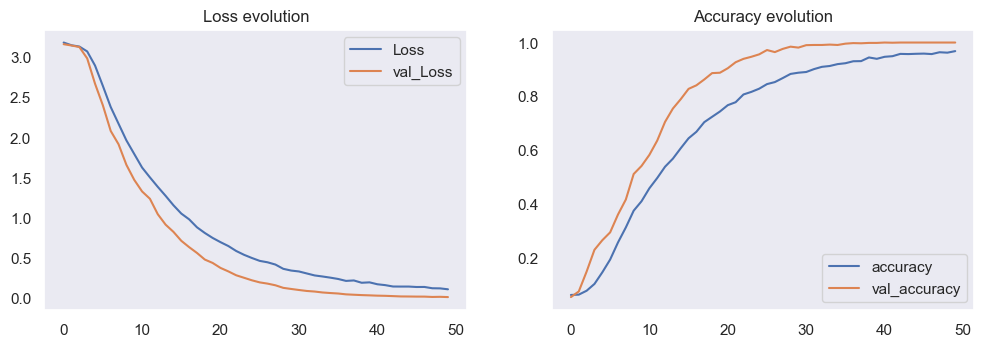

In [19]:

#Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

858/858 [==============================] - 5s 6ms/step


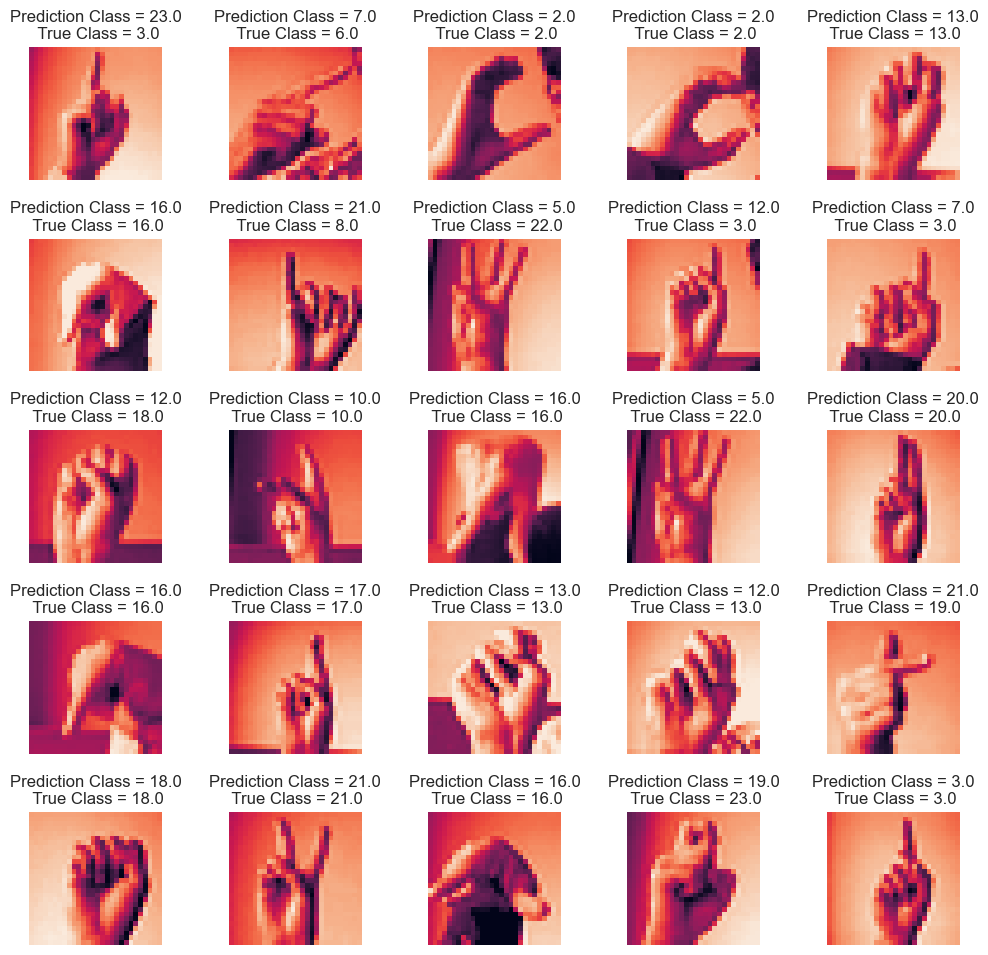

In [20]:

predict_x=model.predict(X_test) 
predicted_classes=np.argmax(predict_x,axis=1)

#Visualize predictions
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [21]:

from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, predicted_classes)
print('Accuracy Score test = ',acc_score)
     

Accuracy Score test =  0.714878892733564


In [22]:
predict_xtrain=model.predict(X_train) 
predicted_train_classes=np.argmax(predict_xtrain,axis=1)
acc_score = accuracy_score(y_train, predicted_train_classes)
print('Accuracy Score of train= ',acc_score)

180/180 [==============================] - 1s 6ms/step
Accuracy Score of train=  1.0


In [23]:
predict_xval=model.predict(X_validate) 
predicted_val_classes=np.argmax(predict_xval,axis=1)
acc_score = accuracy_score(y_validate, predicted_val_classes)
print('Accuracy Score of validation = ',acc_score)

45/45 [==============================] - 0s 7ms/step
Accuracy Score of validation =  1.0


In [24]:

import joblib
joblib.dump(model, 'model.joblib')
     

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......vars
...layers\dropout_3
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d_2
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File 

['model.joblib']

In [25]:
model.save('finalmodel.h5')

In [26]:

import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......vars
...layers\dropout_3
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d_2
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File 